In [241]:
import pandas as pd # Biblioteca para ler a base de dados e fazer calculos matematicos caso precise
import matplotlib.pyplot as plt # Biblioteca para plotar os dados
from sklearn.model_selection  import train_test_split # Biblioteca para dividior os dados teste e treino
from sklearn.tree import DecisionTreeClassifier # Importa o algoritmo da arvore de decisão
from sklearn import tree # Biblioteca para plotar a arvore de decisão
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # Biblioteca para converter string em número para que o sklearn consiga usar
from sklearn.metrics import precision_score # Métrica de precisão do algoritmo
from sklearn.metrics import recall_score # Métrica de recall do algoritmo
from sklearn.metrics import f1_score # Métrica de f1_score


In [242]:
# pip install scikit-learn

In [243]:
df = pd.read_csv('./dados_produtos.csv') # Importa a base de dados

In [244]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [245]:
df.info() # Exibe as informações da base de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [246]:
df.describe() # Descreve os dados

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


Plotando o BOXPLOT dos produtos

<Axes: title={'center': 'Boxplot dos produtos x média avalização'}, xlabel='product_name', ylabel='rating'>

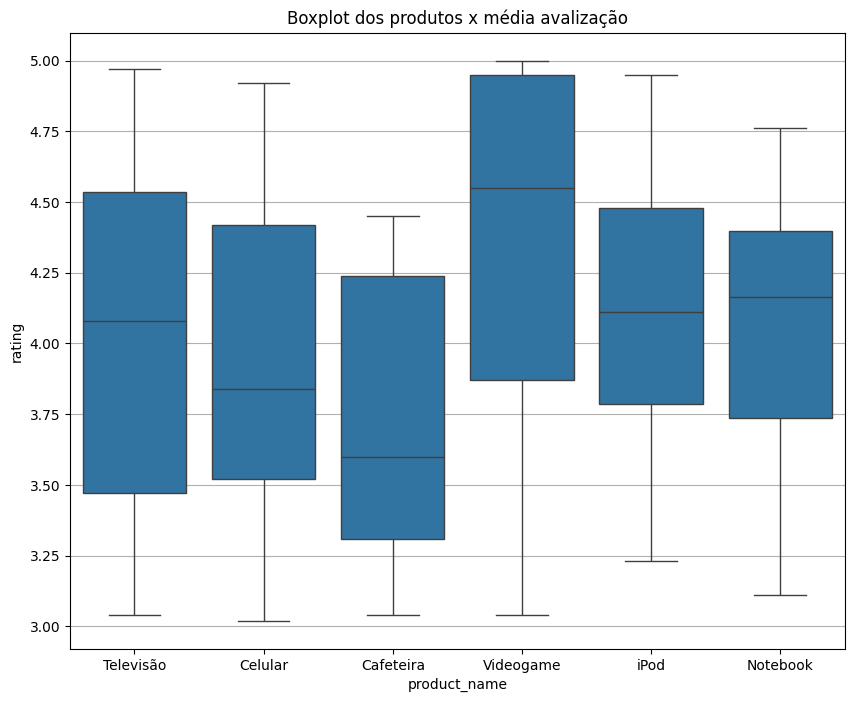

In [247]:
X = df['product_name']
Y = df['rating']

plt.figure(figsize=(10,8))
plt.grid()
plt.title('Boxplot dos produtos x média avalização')
sns.boxplot(x = X, y = Y)

Gerando a Árvore de Decisão GERAL

In [248]:
# *** Árvore geral ***
x1 = df[['rating', 'rating_count']]
y2 = df['purchased']

In [249]:
# Dividindo dados em treino e teste
xGeral_treino, xGeral_teste, yGeral_treino, yGeral_teste = train_test_split(x1, y2,
                                                            test_size=0.2,
                                                            random_state=42)

In [250]:
modelo_geral = DecisionTreeClassifier() # Instância o modelo
modelo_geral.fit(xGeral_treino,yGeral_treino) # Treina o modelo

DecisionTreeClassifier()

In [251]:
previsoes_Gerais = modelo_geral.predict(xGeral_teste) # Gera previsóes para teste

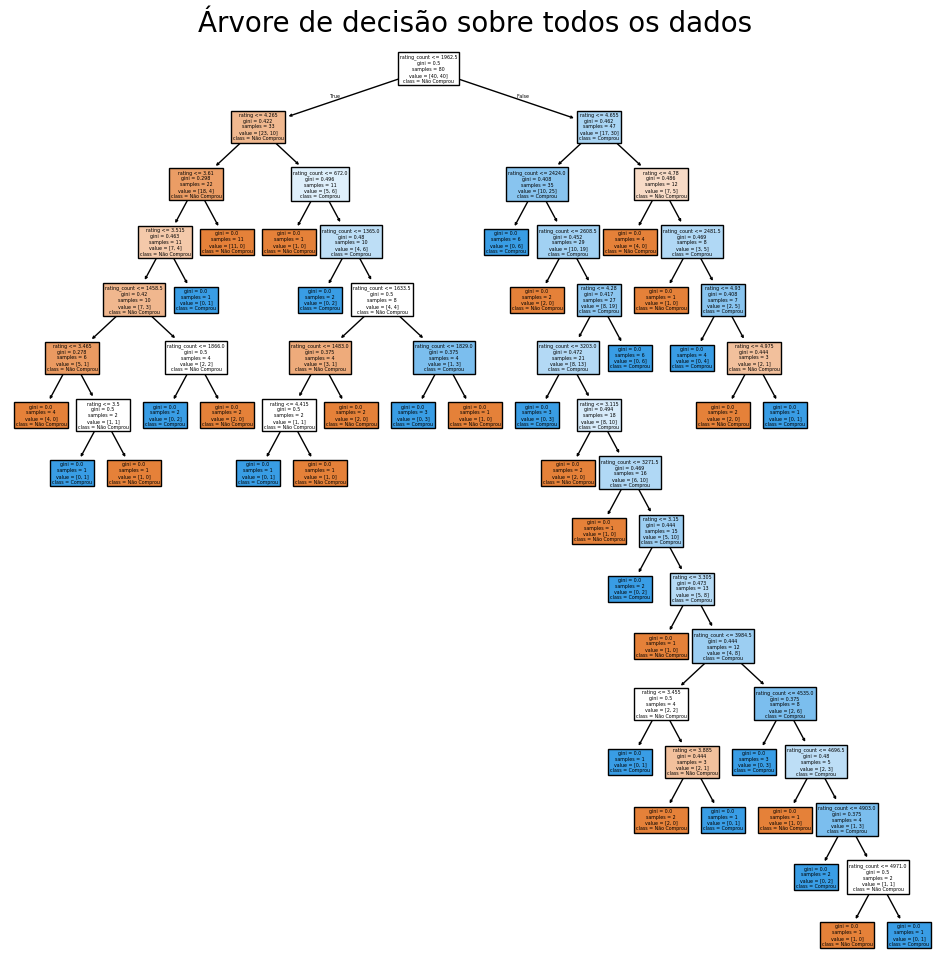

In [252]:
plt.figure(figsize=(12, 12))
tree.plot_tree(modelo_geral,
               feature_names=['rating', 'rating_count'],  # Nomes das features
               class_names=['Não Comprou', 'Comprou'],    # Nomes das classes
               filled=True)
plt.title('Árvore de decisão sobre todos os dados', fontsize=20)

plt.show()

In [287]:
precision = precision_score(yGeral_teste, previsoes_Gerais, pos_label=1)
precision

np.float64(0.7)

In [288]:
recall = recall_score(yGeral_teste, previsoes_Gerais, pos_label=1)
recall

np.float64(0.4666666666666667)

In [289]:
f1score = f1_score(yGeral_teste, previsoes_Gerais, pos_label=1)
f1score

np.float64(0.56)

Gerando a Árvore de Decisão TELEVISÃO

In [256]:
# Separando apenas os dados da Televisão
xtv = df.loc[df['product_name'] == 'Televisão', ['rating', 'rating_count']]
ytv = df.loc[df['product_name'] == 'Televisão', 'purchased']

In [257]:
# Dividindo dados em treino e teste
xTV_treino, xTV_teste, yTV_treino, yTV_teste = train_test_split(xtv, ytv,
                                                            test_size=0.2,
                                                            random_state=42)

In [258]:
modelo_TV = DecisionTreeClassifier() # Instância o modelo
modelo_TV.fit(xTV_treino,yTV_treino) # Treina o modelo

DecisionTreeClassifier()

In [259]:
previsoes_TV = modelo_TV.predict(xTV_teste) # Gera previsóes para teste

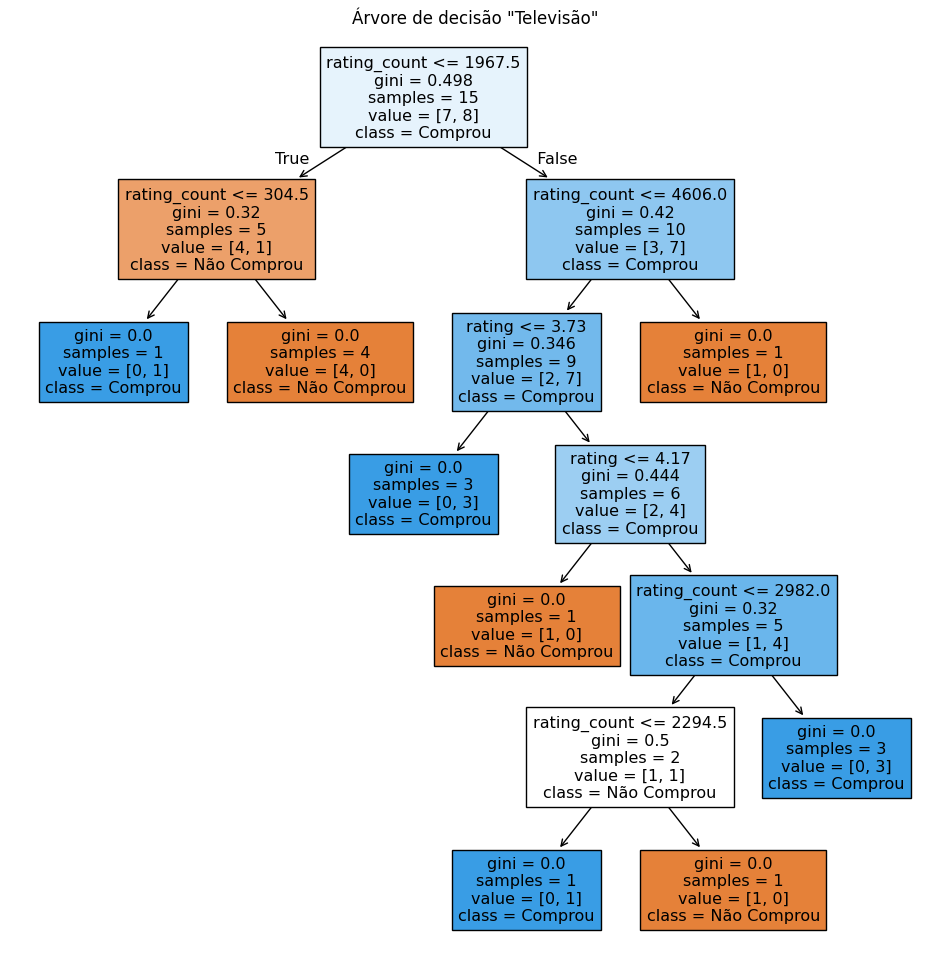

In [260]:
plt.figure(figsize=(12, 12))
tree.plot_tree(modelo_TV,
               feature_names=['rating', 'rating_count'],  # Nomes das features
               class_names=['Não Comprou', 'Comprou'],    # Nomes das classes
               filled=True)
plt.title('Árvore de decisão "Televisão"')
plt.show()

In [290]:
precisionTV = precision_score(yTV_teste, previsoes_TV, pos_label=1)
precisionTV

np.float64(1.0)

In [291]:
recallTV = recall_score(yTV_teste, previsoes_TV, pos_label=1)
recallTV

np.float64(0.3333333333333333)

In [292]:
f1scoreTV = f1_score(yTV_teste, previsoes_TV, pos_label=1)
f1scoreTV

np.float64(0.5)

Gerando a Árvore de Decisão CELULAR

In [261]:
# Separando apenas os dados do Celular
xCelular = df.loc[df['product_name'] == 'Celular', ['rating', 'rating_count']]
yCelular = df.loc[df['product_name'] == 'Celular', 'purchased']

In [262]:
# Dividindo dados em treino e teste
xCelular_treino, xCelular_teste, yCelular_treino, yCelular_teste = train_test_split(xCelular, yCelular,
                                                            test_size=0.2,
                                                            random_state=42)

In [263]:
modelo_Celular = DecisionTreeClassifier() # Instância o modelo
modelo_Celular.fit(xCelular_treino,yCelular_treino) # Treina o modelo

DecisionTreeClassifier()

In [264]:
previsoes_Celular = modelo_Celular.predict(xCelular_teste) # Gera previsóes para teste

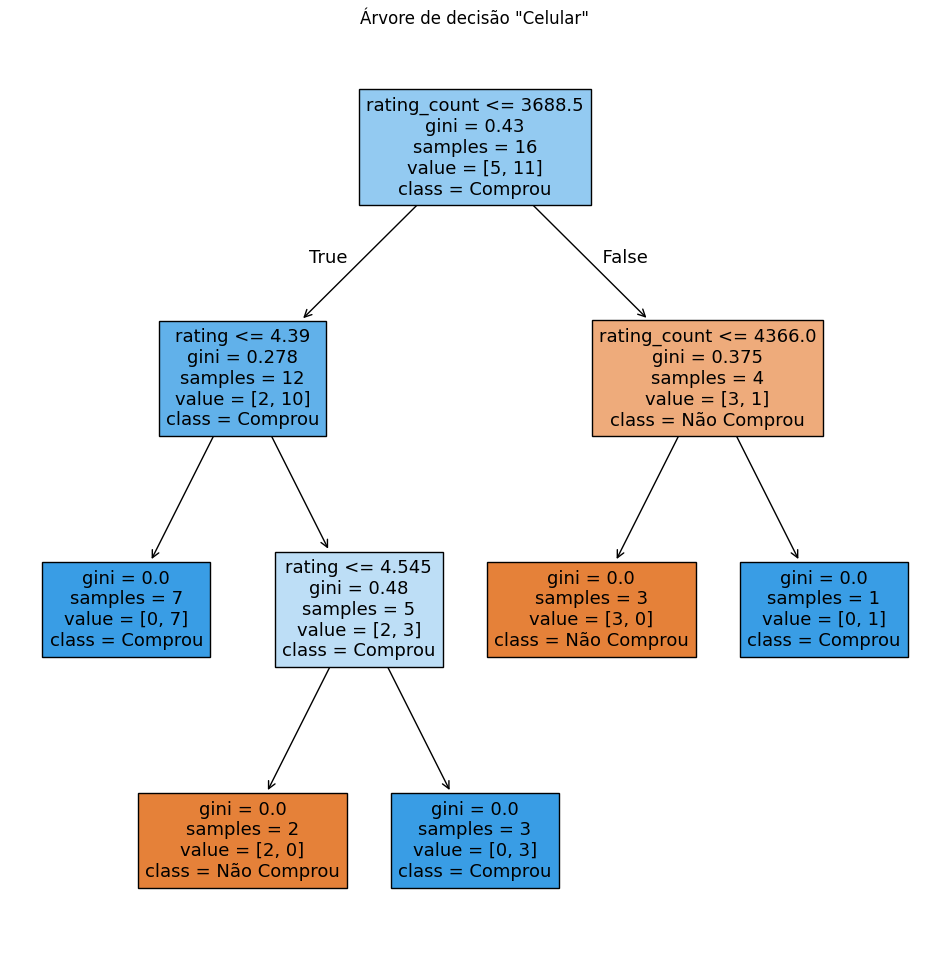

In [265]:
plt.figure(figsize=(12, 12))
tree.plot_tree(modelo_Celular,
               feature_names=['rating', 'rating_count'],  # Nomes das features
               class_names=['Não Comprou', 'Comprou'],    # Nomes das classes
               filled=True)
plt.title('Árvore de decisão "Celular"')
plt.show()

In [297]:
precisionCelular = precision_score(yCelular_teste, previsoes_Celular, pos_label=1)
precisionCelular

np.float64(0.5)

In [298]:
recallCelular = recall_score(yCelular_teste, previsoes_Celular, pos_label=1)
recallCelular

np.float64(1.0)

In [303]:
f1scoreCelular = f1_score(yCelular_teste, previsoes_Celular, pos_label=1)
f1scoreCelular

np.float64(0.6666666666666666)

Gerando a Árvore de Decisão CAFETEIRA

In [266]:
# Separando apenas os dados do Cafeteira
xCafeteira = df.loc[df['product_name'] == 'Cafeteira', ['rating', 'rating_count']]
yCafeteira = df.loc[df['product_name'] == 'Cafeteira', 'purchased']

In [267]:
# Dividindo dados em treino e teste
xCafeteira_treino, xCafeteira_teste, yCafeteira_treino, yCafeteira_teste = train_test_split(xCafeteira, yCafeteira,
                                                            test_size=0.2,
                                                            random_state=42)

In [268]:
modelo_Cafeteira = DecisionTreeClassifier() # Instância o modelo
modelo_Cafeteira.fit(xCafeteira_treino,yCafeteira_treino) # Treina o modelo

DecisionTreeClassifier()

In [269]:
previsoes_Cafeteira = modelo_Cafeteira.predict(xCafeteira_teste) # Gera previsóes para teste

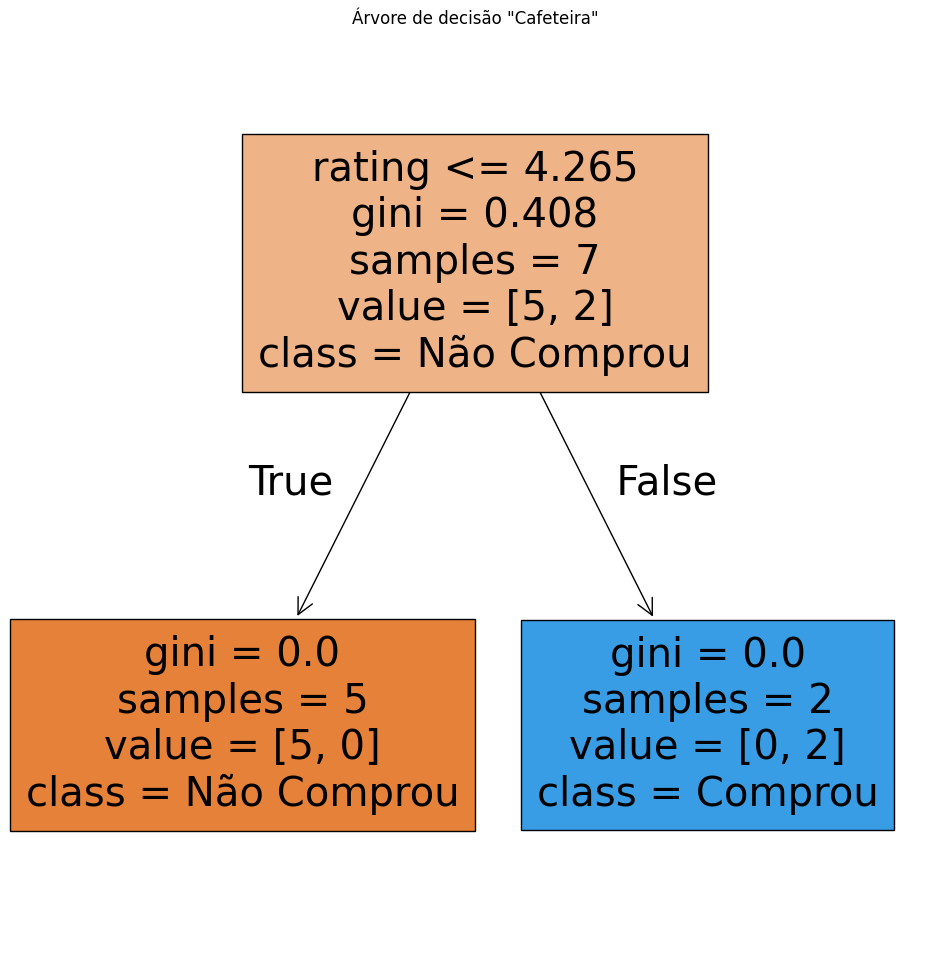

In [270]:
plt.figure(figsize=(12, 12))
tree.plot_tree(modelo_Cafeteira,
               feature_names=['rating', 'rating_count'],  # Nomes das features
               class_names=['Não Comprou', 'Comprou'],    # Nomes das classes
               filled=True)
plt.title('Árvore de decisão "Cafeteira"')
plt.show()

In [296]:
precisionCafeteira = precision_score(yCafeteira_teste, previsoes_Cafeteira, pos_label=1)
precisionCafeteira

C:\Users\dsadm\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


np.float64(0.0)

In [299]:
recallCafeteira = recall_score(yCafeteira_teste, previsoes_Cafeteira, pos_label=1)
recallCafeteira

np.float64(0.0)

In [304]:
f1scoreCafeteira = f1_score(yCafeteira_teste, previsoes_Cafeteira, pos_label=1)
f1scoreCafeteira

np.float64(0.0)

Gerando a Árvore de Decisão VIDEOGAME

In [271]:
# Separando apenas os dados do Videogame
xVideogame = df.loc[df['product_name'] == 'Videogame', ['rating', 'rating_count']]
yVideogame = df.loc[df['product_name'] == 'Videogame', 'purchased']

In [272]:
# Dividindo dados em treino e teste
xVideogame_treino, xVideogame_teste, yVideogame_treino, yVideogame_teste = train_test_split(xVideogame, yVideogame,
                                                            test_size=0.2,
                                                            random_state=42)

In [273]:
modelo_Videogame = DecisionTreeClassifier() # Instância o modelo
modelo_Videogame.fit(xVideogame_treino,yVideogame_treino) # Treina o modelo

DecisionTreeClassifier()

In [274]:
previsoes_Videogame = modelo_Videogame.predict(xVideogame_teste) # Gera previsóes para teste

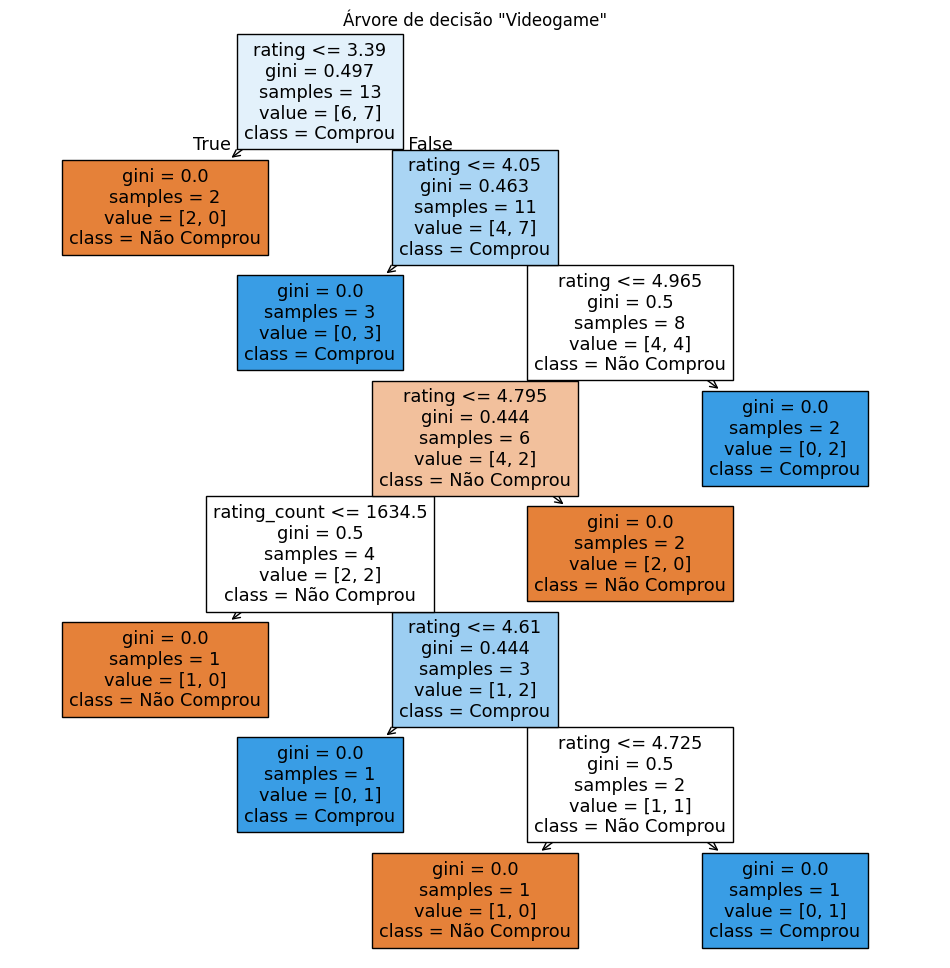

In [275]:
plt.figure(figsize=(12, 12))
tree.plot_tree(modelo_Videogame,
               feature_names=['rating', 'rating_count'],  # Nomes das features
               class_names=['Não Comprou', 'Comprou'],    # Nomes das classes
               filled=True)
plt.title('Árvore de decisão "Videogame"')
plt.show()

In [295]:
precisionVideogame = precision_score(yVideogame_teste, previsoes_Videogame, pos_label=1)
precisionVideogame

np.float64(1.0)

In [300]:
recallVideogame = recall_score(yVideogame_teste, previsoes_Videogame, pos_label=1)
recallVideogame

np.float64(1.0)

In [305]:
f1scoreVideogame = f1_score(yVideogame_teste, previsoes_Videogame, pos_label=1)
f1scoreVideogame

np.float64(1.0)

Gerando a Árvore de Decisão IPOD

In [276]:
# Separando apenas os dados do Ipod
xIpod = df.loc[df['product_name'] == 'iPod', ['rating', 'rating_count']]
yIpod = df.loc[df['product_name'] == 'iPod', 'purchased']

In [277]:
# Dividindo dados em treino e teste
xIpod_treino, xIpod_teste, yIpod_treino, yIpod_teste = train_test_split(xIpod, yIpod,
                                                            test_size=0.2,
                                                            random_state=42)

In [278]:
modelo_Ipod = DecisionTreeClassifier() # Instância o modelo
modelo_Ipod.fit(xIpod_treino,yIpod_treino) # Treina o modelo

DecisionTreeClassifier()

In [283]:
previsoes_Ipod = modelo_Ipod.predict(xIpod_teste) # Gera previsóes para teste

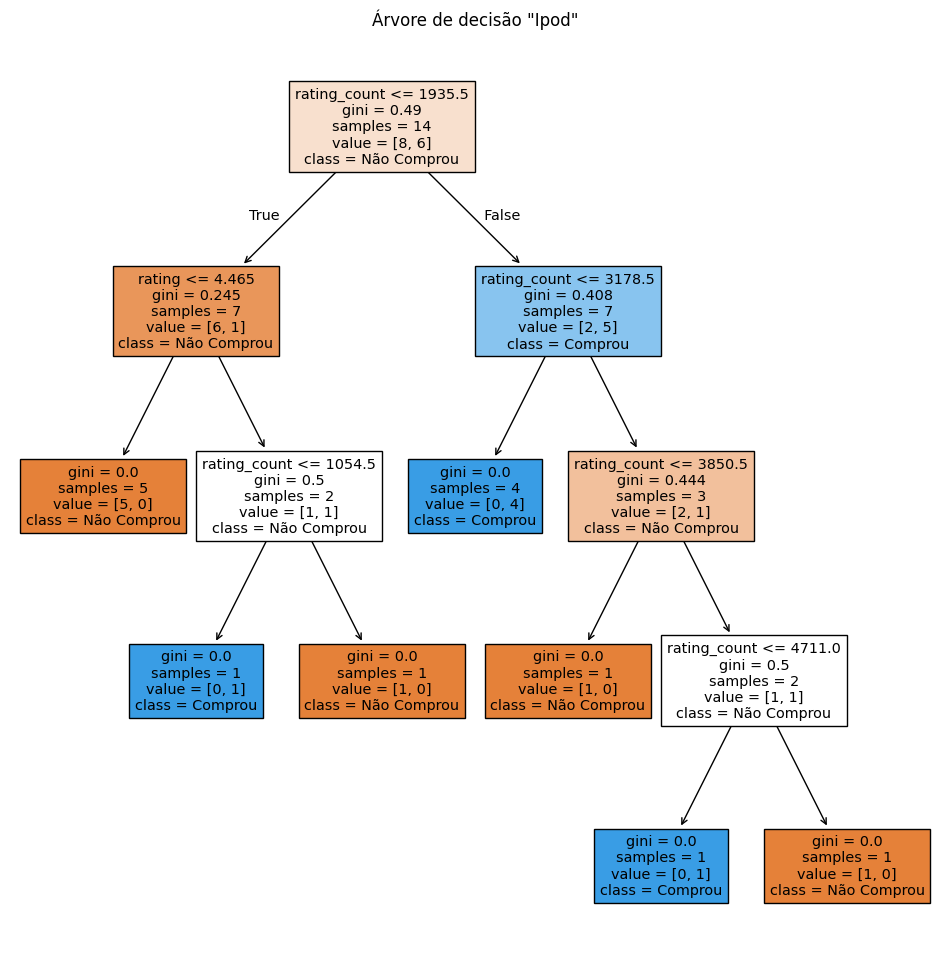

In [285]:
plt.figure(figsize=(12, 12))
tree.plot_tree(modelo_Ipod,
               feature_names=['rating', 'rating_count'],  # Nomes das features
               class_names=['Não Comprou', 'Comprou'],    # Nomes das classes
               filled=True)
plt.title('Árvore de decisão "Ipod"')
plt.show()

In [294]:
precisionIpod = precision_score(yIpod_teste, previsoes_Ipod, pos_label=1)
precisionIpod

np.float64(0.0)

In [301]:
recallIpod = recall_score(yIpod_teste, previsoes_Ipod, pos_label=1)
recallIpod

np.float64(0.0)

In [306]:
f1scoreIpod = f1_score(yIpod_teste, previsoes_Ipod, pos_label=1)
f1scoreIpod

np.float64(0.0)

Gerando a Árvore de Decisão NOTEBOOK

In [279]:
# Separando apenas os dados do Notebook
xNotebook = df.loc[df['product_name'] == 'Notebook', ['rating', 'rating_count']]
yNotebook = df.loc[df['product_name'] == 'Notebook', 'purchased']

In [280]:
# Dividindo dados em treino e teste
xNotebook_treino, xNotebook_teste, yNotebook_treino, yNotebook_teste = train_test_split(xNotebook, yNotebook,
                                                            test_size=0.2,
                                                            random_state=42)

In [281]:
modelo_Notebook = DecisionTreeClassifier() # Instância o modelo
modelo_Notebook.fit(xNotebook_treino,yNotebook_treino) # Treina o modelo

DecisionTreeClassifier()

In [282]:
previsoes_Notebook = modelo_Notebook.predict(xNotebook_teste) # Gera previsóes para teste

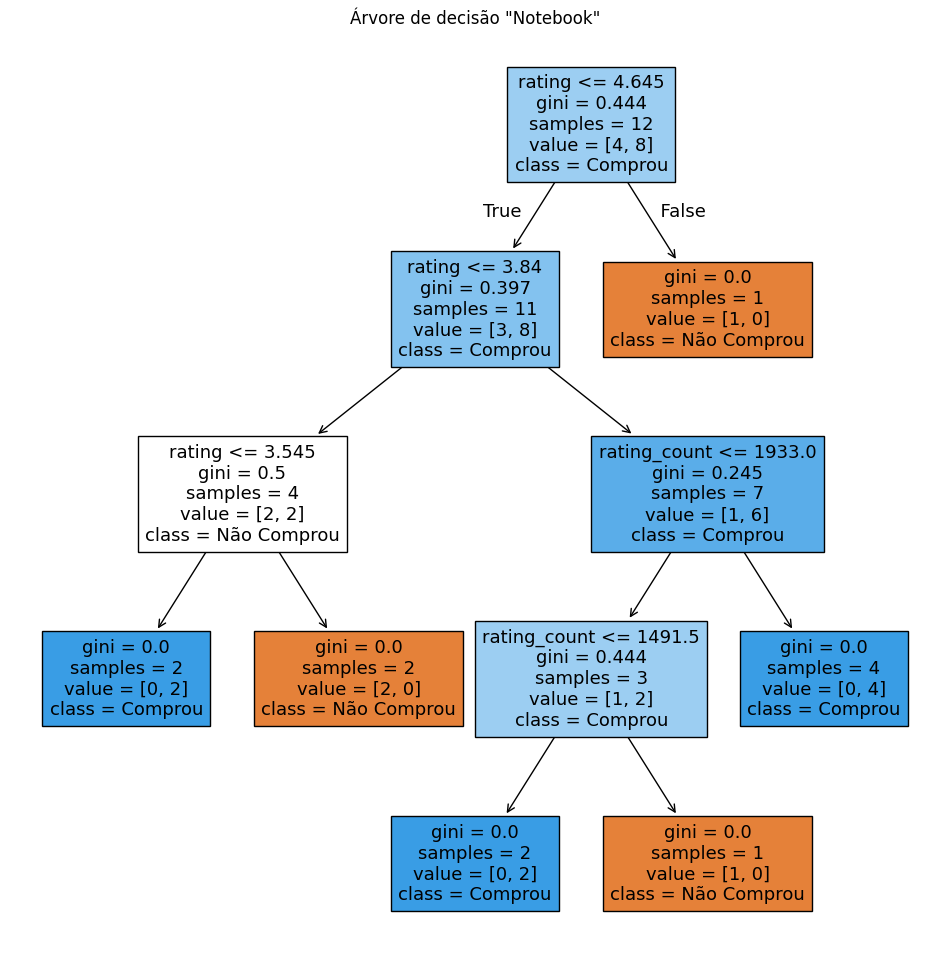

In [284]:
plt.figure(figsize=(12, 12))
tree.plot_tree(modelo_Notebook,
               feature_names=['rating', 'rating_count'],  # Nomes das features
               class_names=['Não Comprou', 'Comprou'],    # Nomes das classes
               filled=True)
plt.title('Árvore de decisão "Notebook"')
plt.show()

In [293]:
precisionNotebook = precision_score(yNotebook_teste, previsoes_Notebook, pos_label=1)
precisionNotebook

np.float64(0.3333333333333333)

In [302]:
recallNotebook = recall_score(yNotebook_teste, previsoes_Notebook, pos_label=1)
recallNotebook

np.float64(1.0)

In [307]:
f1scoreNotebook = f1_score(yNotebook_teste, previsoes_Notebook, pos_label=1)
f1scoreNotebook

np.float64(0.5)